C:\Users\jonat\AppData\Local\Temp\ipykernel_6744\2861215994.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


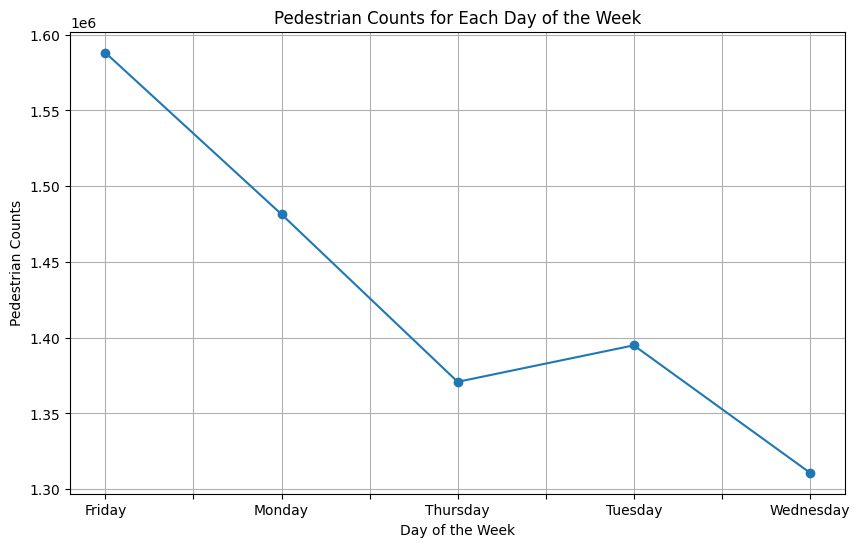

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' column to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Filter data to include only weekdays
weekdays = df[(df['hour_beginning'].dt.dayofweek >= 0) & (df['hour_beginning'].dt.dayofweek <= 4)]  #Check documentation

# Aggregate pedestrian counts for each day of the week
ped_counts_per_day = weekdays.groupby(weekdays['hour_beginning'].dt.day_name())['Pedestrians'].sum()

# Plotting
plt.figure(figsize=(10, 6))
ped_counts_per_day.plot(kind='line', marker='o') #Making a line plot
plt.title('Pedestrian Counts for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()


In [1]:
import seaborn as sns

# Filter data for the Brooklyn Bridge and year 2019
brooklyn_bridge_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

# Perform one-hot encoding for 'weather_summary'-* Since weather summary is a non-numerical column, we have to encode it to find how it correlates with another column
weather_summary_encoded = pd.get_dummies(brooklyn_bridge_2019['weather_summary'])

# Concatenate encoded weather summary with pedestrian counts
encoded_data = pd.concat([weather_summary_encoded, brooklyn_bridge_2019['Pedestrians']], axis=1)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Weather Summary and Pedestrian Counts')
plt.show()


NameError: name 'df' is not defined

In [ ]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Create new column to store time of day categories
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Aggregating pedestrian count throughout the day
ped_counts_per_time_of_day = df.groupby('time_of_day')['Pedestrians'].sum()

print("Pedestrian Activity Patterns Throughout the Day:")
print(ped_counts_per_time_of_day)